<a href="https://colab.research.google.com/github/abdurahmanovakarina/SnowDeliveryTrackingSystem/blob/main/%D0%98%D0%BD%D0%B4%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80_%D0%B2%D0%B5%D1%81%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat May 18 12:46:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet

from roboflow import Roboflow
rf = Roboflow(api_key="FpcybzEnpyEdIri3A4CI")
project = rf.workspace("project-3dczy").project("scale-indicators")
version = project.version(2)
dataset = version.download("yolov8")

/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 818.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.9 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to scale-indicators-2 in yolov8:: 100%|██████████| 2110/2110 [00:00<00:00, 4919.23it/s]


In [6]:
%cd {HOME}

for i in ["n","s","m","l", "x"]:
  !yolo task=detect mode=train model=yolov8{i}.pt data={dataset.location}/data.yaml epochs=25 imgsz=640 plots=True

/content
100% 6.23M/6.23M [00:00<00:00, 77.4MB/s]
New https://pypi.org/project/ultralytics/8.2.17 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/scale-indicators-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, str

In [7]:
!cat {HOME}/runs/detect/train/results.csv | head -10

                  epoch,         train/box_loss,         train/cls_loss,         train/dfl_loss,   metrics/precision(B),      metrics/recall(B),       metrics/mAP50(B),    metrics/mAP50-95(B),           val/box_loss,           val/cls_loss,           val/dfl_loss,                 lr/pg0,                 lr/pg1,                 lr/pg2
                      1,                0.84685,                 2.2897,                 1.0493,                0.00333,                      1,                0.01036,                0.00921,                0.45268,                 3.4927,                0.71502,             0.00065217,             0.00065217,             0.00065217
                      2,                0.65097,                 1.1275,                0.88054,                0.99956,                      1,                  0.995,                0.89066,                0.49518,                 1.3415,                0.71611,              0.0012666,              0.0012666,              0.

In [8]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		val_batch0_pred.jpg
confusion_matrix.png				    results.png		val_batch1_labels.jpg
events.out.tfevents.1716036536.a2f206f7924a.1404.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	val_batch2_pred.jpg
labels.jpg					    train_batch690.jpg	weights
P_curve.png					    train_batch691.jpg
PR_curve.png					    train_batch692.jpg


/content


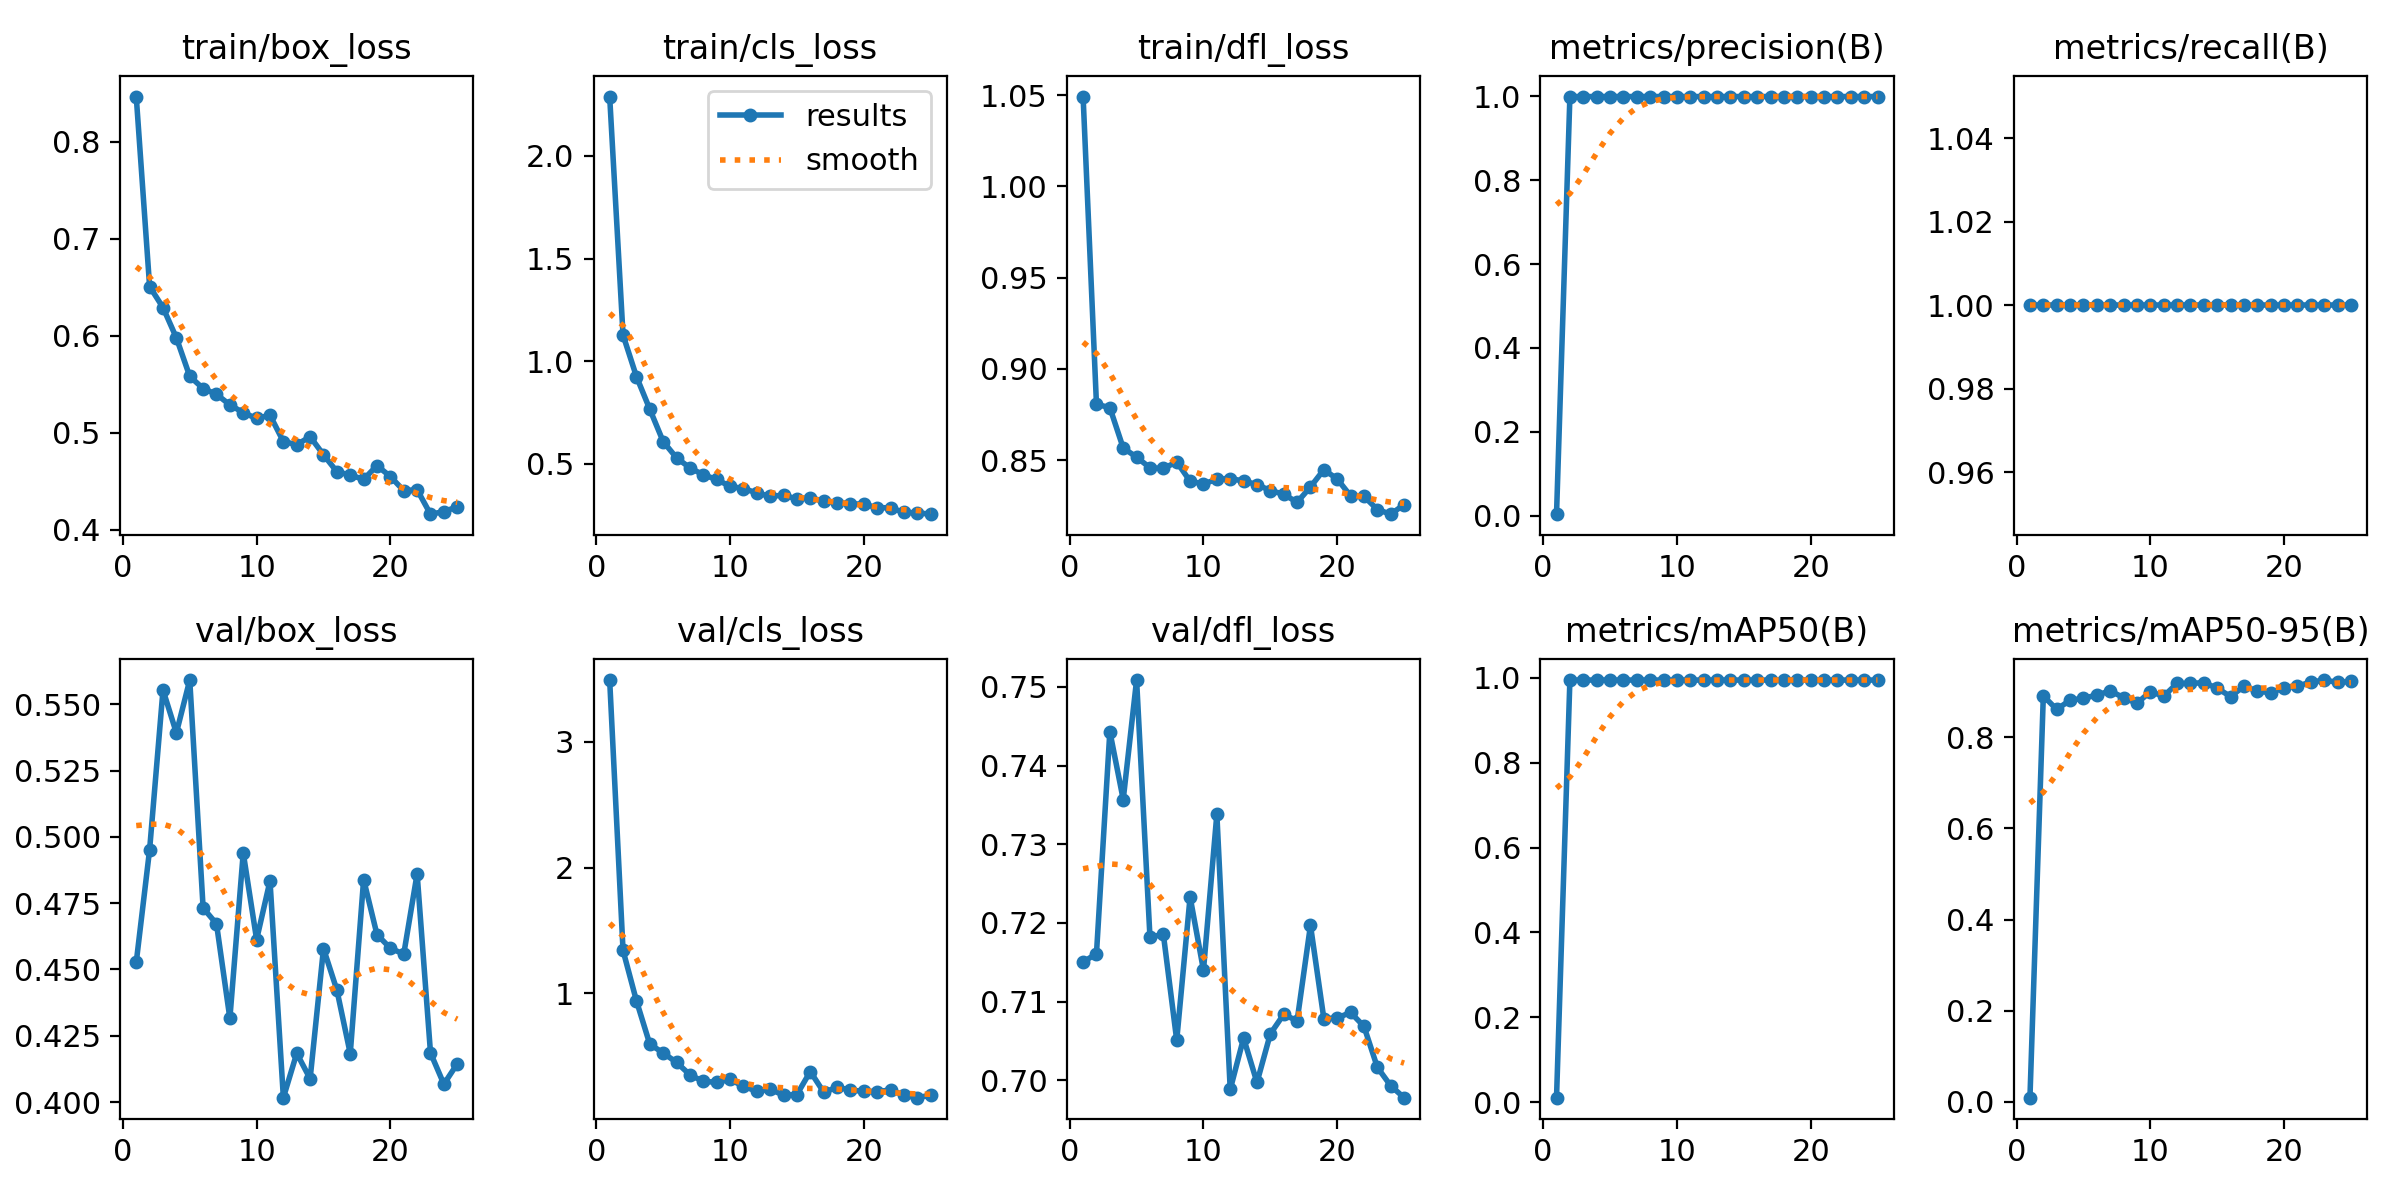

In [9]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


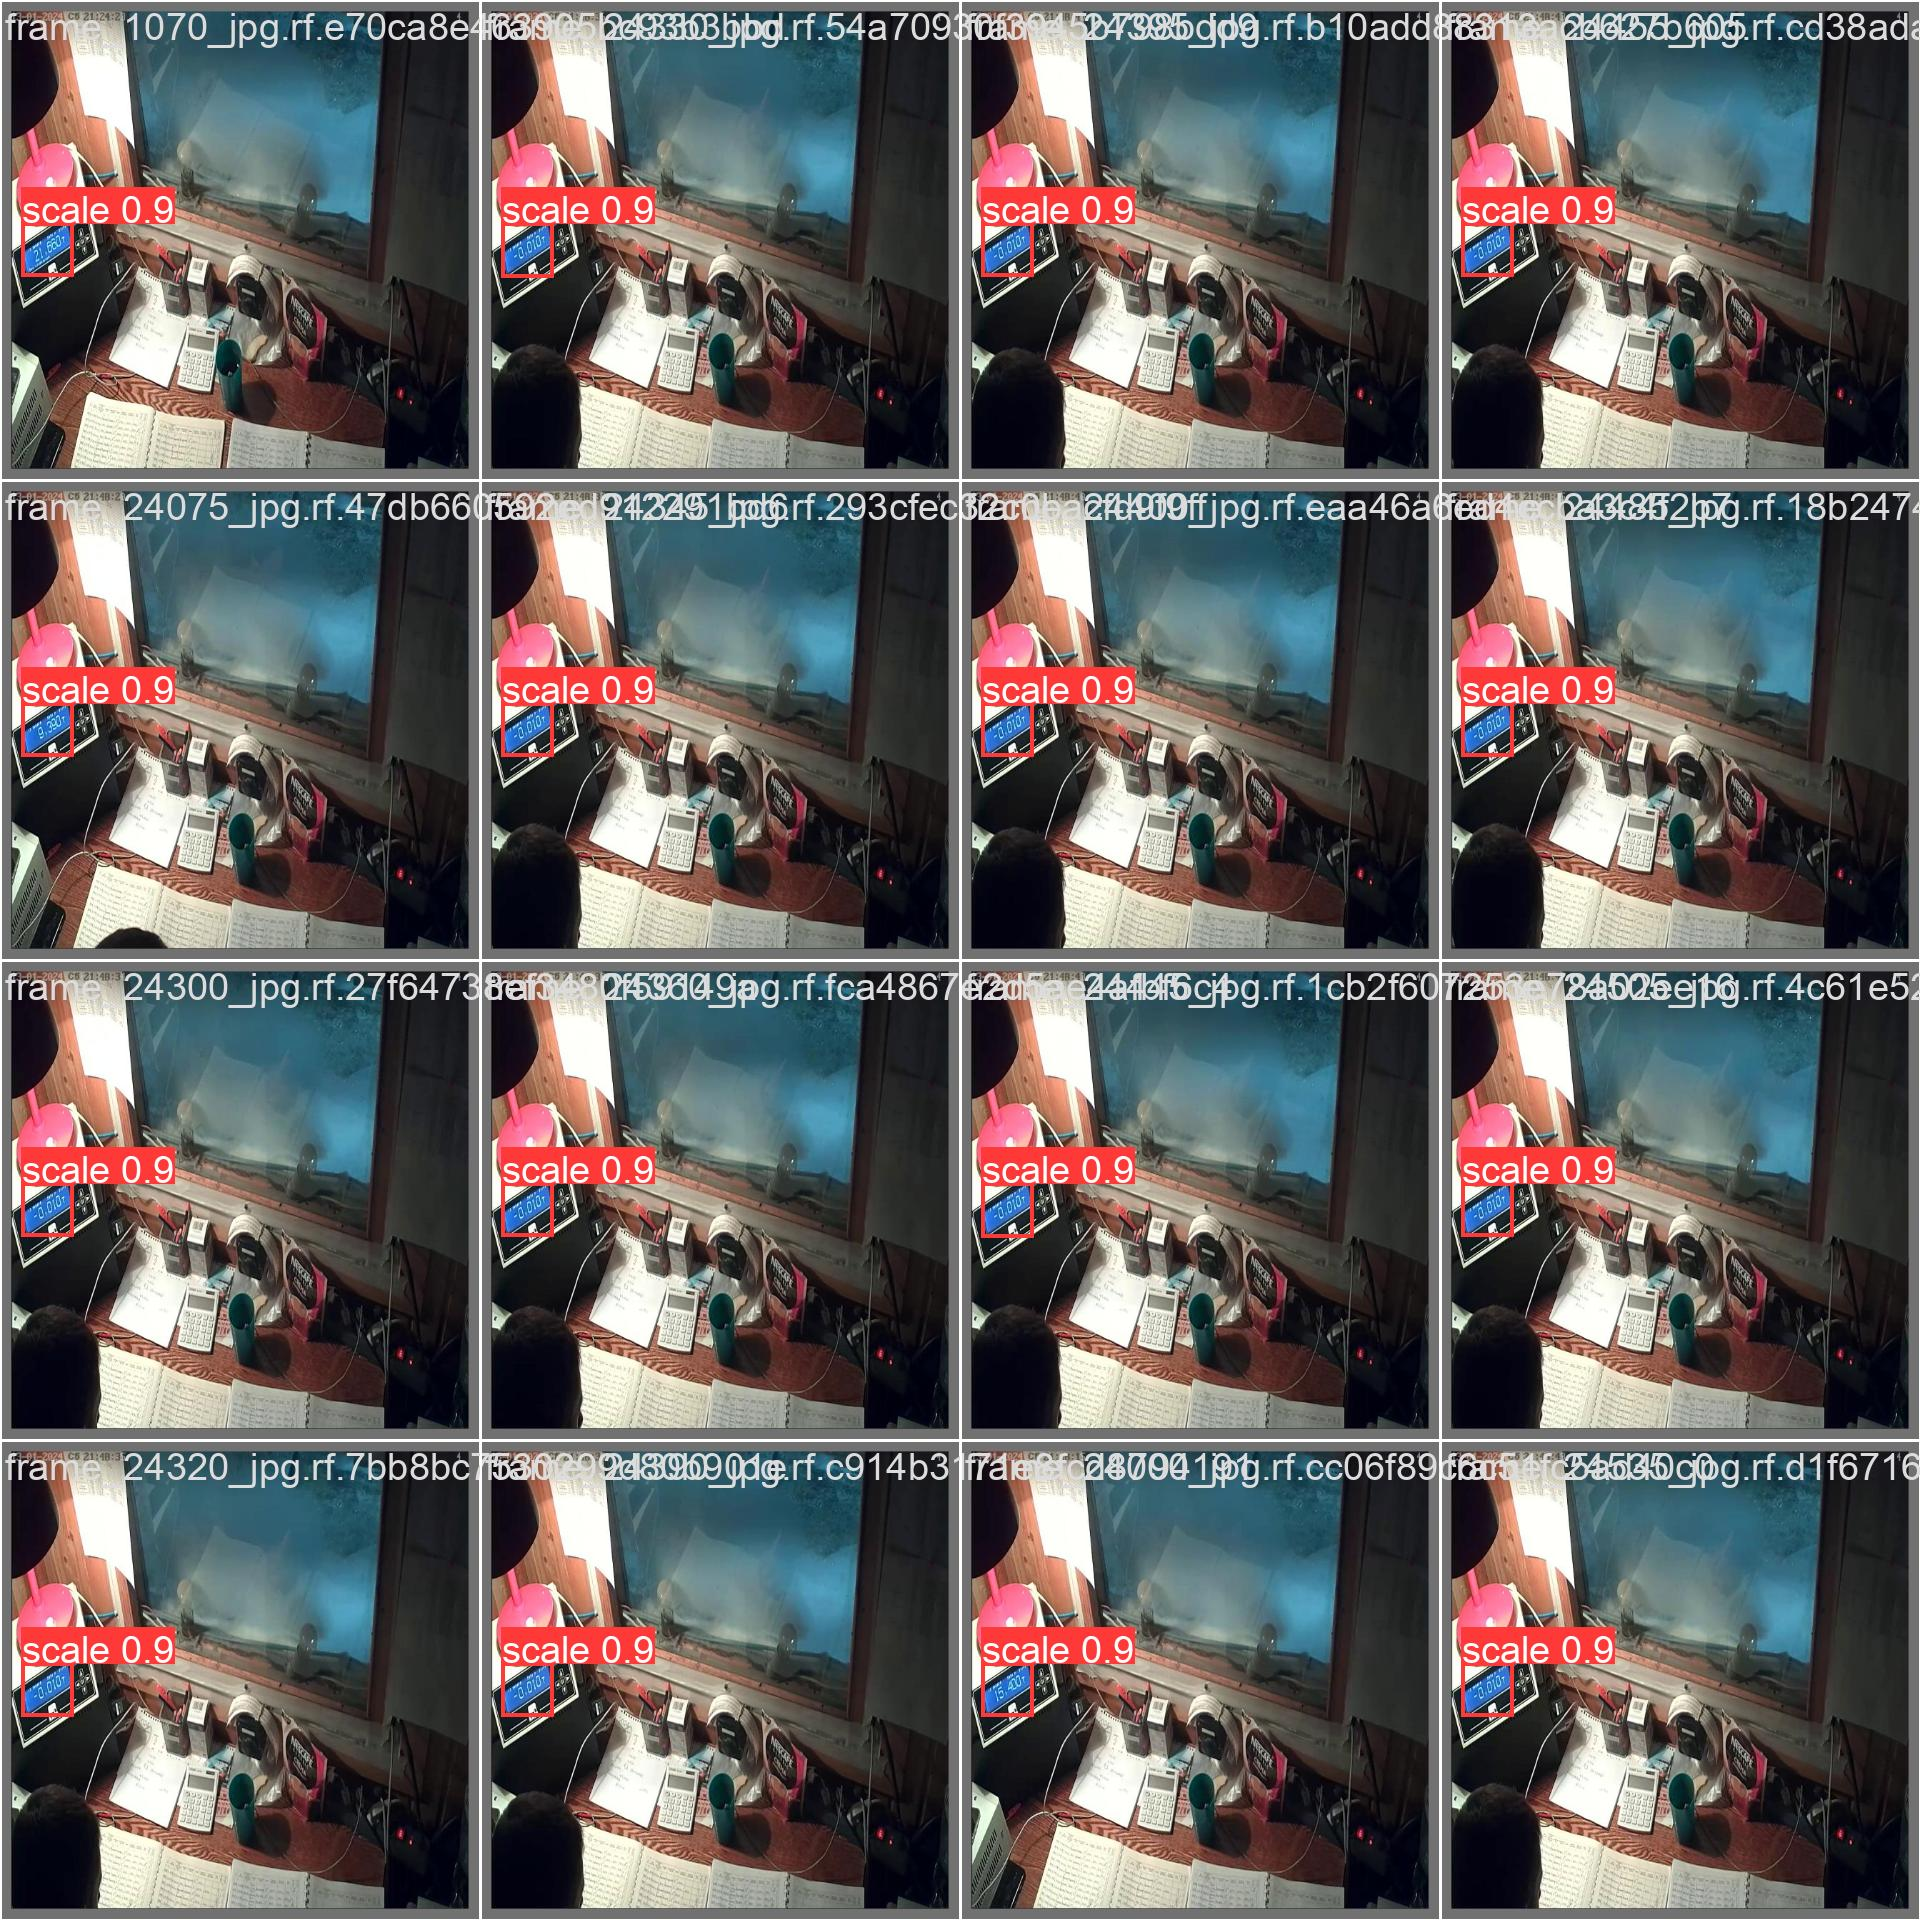

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [11]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/datasets/scale-indicators-2/valid/labels.cache... 210 images, 0 backgrounds, 0 corrupt: 100% 210/210 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 14/14 [00:04<00:00,  2.86it/s]
                   all        210        210          1          1      0.995      0.923
Speed: 1.5ms preprocess, 7.1ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [12]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/105 /content/datasets/scale-indicators-2/test/images/frame_1010_jpg.rf.bc2b608c2d8cc49533ca6665ea491b45.jpg: 640x640 1 scale, 11.3ms
image 2/105 /content/datasets/scale-indicators-2/test/images/frame_1030_jpg.rf.81a04e64619b362e73f54bed0387138a.jpg: 640x640 1 scale, 7.4ms
image 3/105 /content/datasets/scale-indicators-2/test/images/frame_1140_jpg.rf.aaef4aff36464d82da4ac12c586fefa7.jpg: 640x640 1 scale, 7.3ms
image 4/105 /content/datasets/scale-indicators-2/test/images/frame_1155_jpg.rf.77513382a0c7024b894f28cb41943da0.jpg: 640x640 1 scale, 7.3ms
image 5/105 /content/datasets/scale-indicators-2/test/images/frame_1165_jpg.rf.88e970f72d9a1c3526bf0a9f1ee59629.jpg: 640x640 1 scale, 7.4ms
image 6/105 /content/datasets/scale-indicators-2/test/images/frame_1460_jpg.rf.9

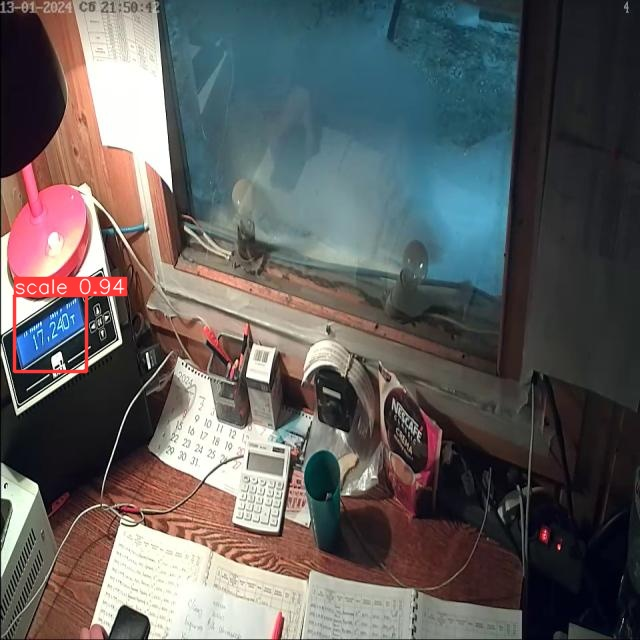

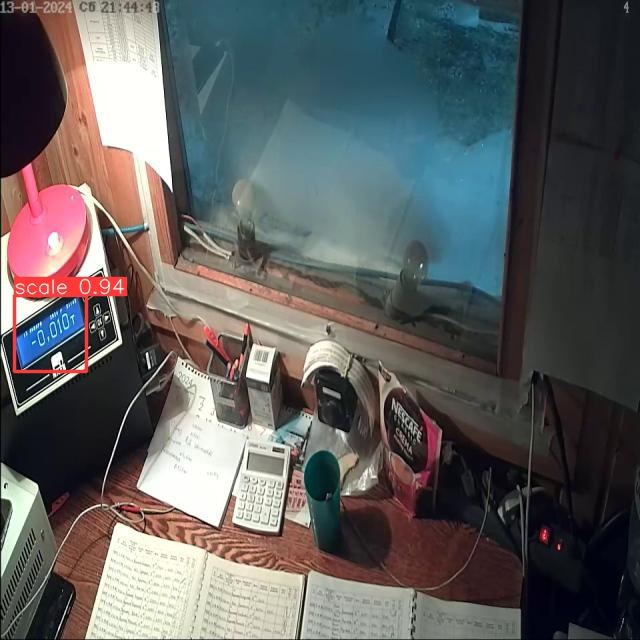

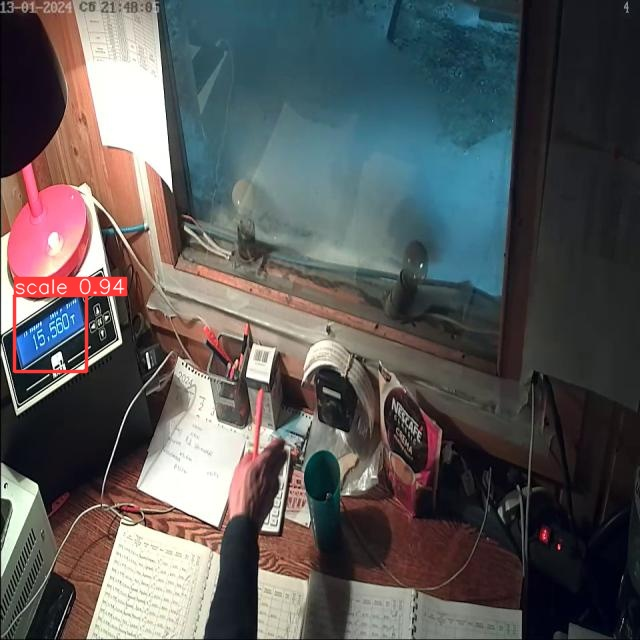

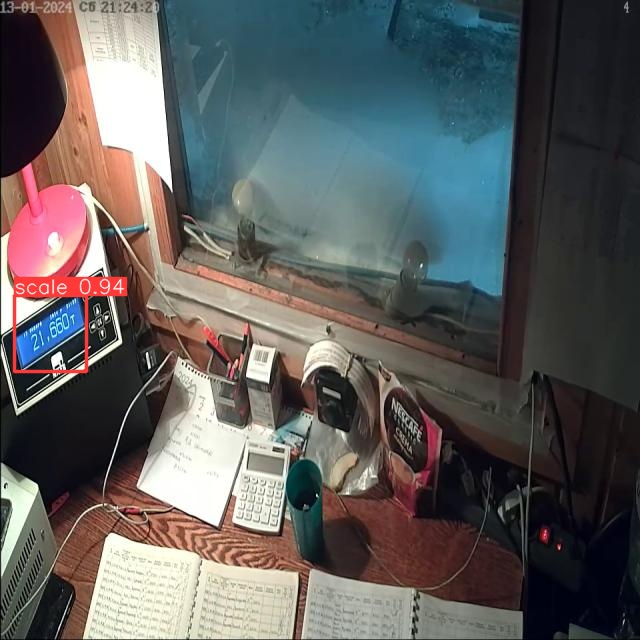

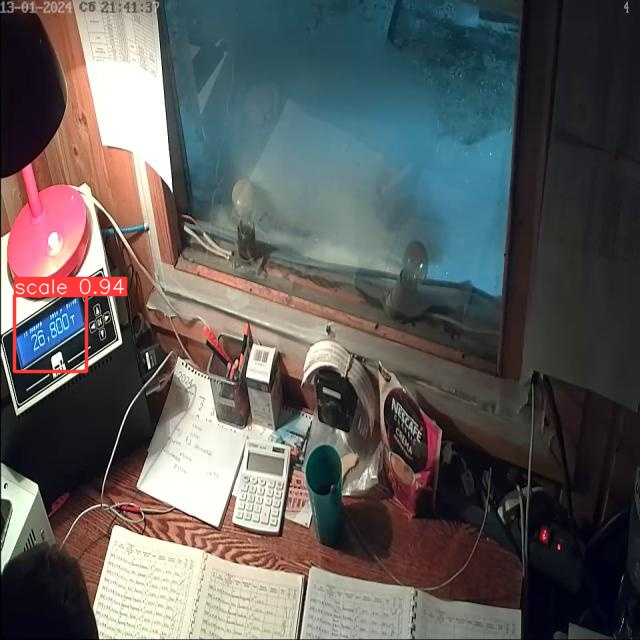

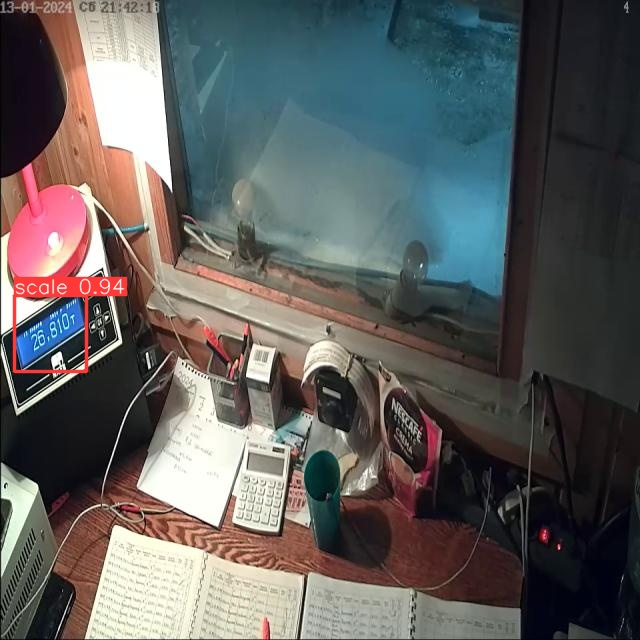

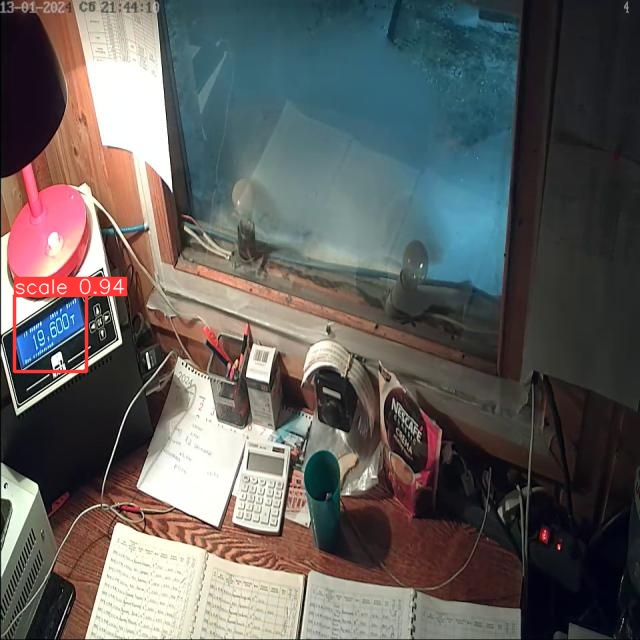

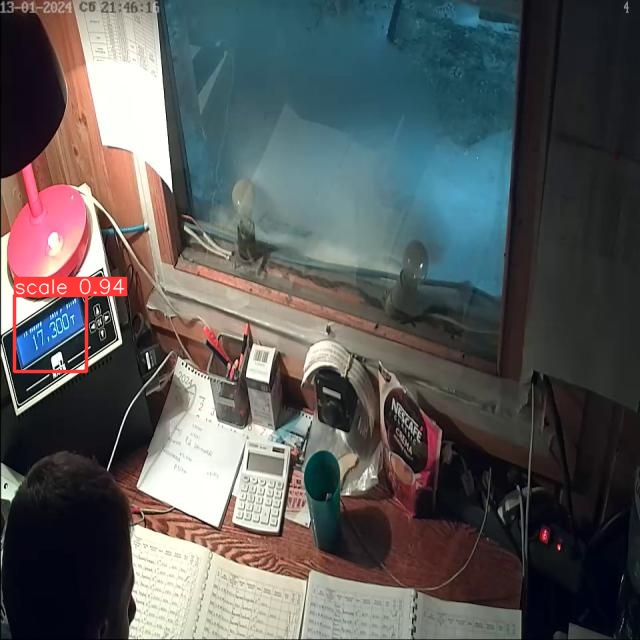

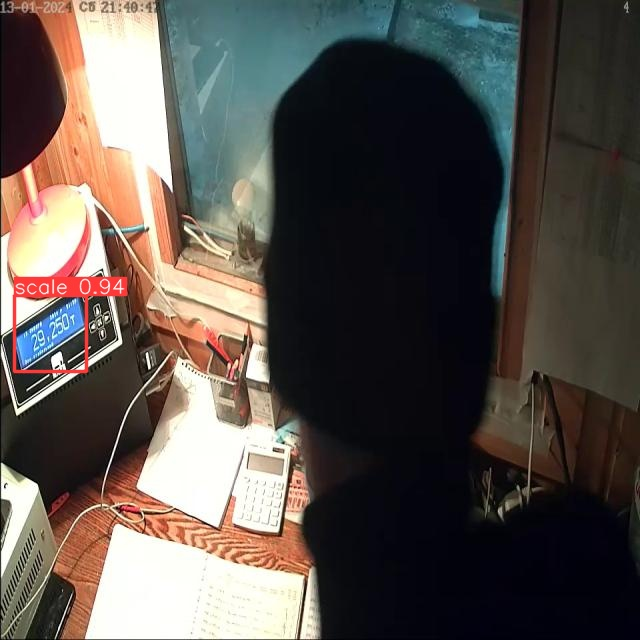

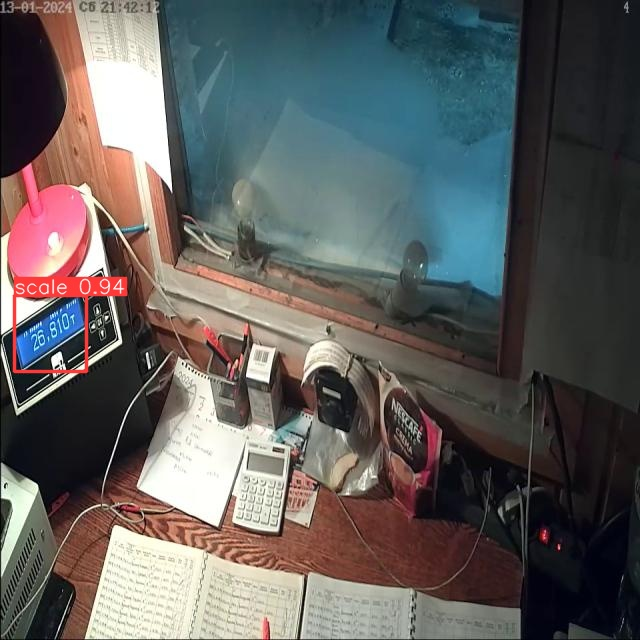

In [13]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [18]:
from google.colab import drive

# Подключение Google Drive
drive.mount('/content/drive')

# Путь к файлам на Google Colab
source_path = '/content/runs/detect'


destination_path = '/content/drive/My Drive/YOLO_Results/'

# Копирование файлов на Google Диск
!cp -r "{source_path}" "{destination_path}"

Mounted at /content/drive
